In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn. metrics import classification_report, accuracy_score


In [2]:
types_dict = {'counter_statue': str}
df = pd.read_csv('invoice_train.csv', low_memory=False, dtype= types_dict)
df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [4]:
df.shape

(4476749, 16)

In [5]:
df.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [6]:
new_df = df.drop(['invoice_date','counter_number', 'counter_code'], axis=1)
new_df.head()

,client_id,tarif_type,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,11,0,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,11,0,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,11,0,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,11,0,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,11,0,9,1,572,0,0,0,15066,15638,12,ELEC


In [7]:
df1 = pd.read_csv('client_train.csv')

In [8]:
df1.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [9]:
df1.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target'],
      dtype='object')

In [10]:
new_df1 = df1.drop(['client_catg','disrict', 'region', 'creation_date'], axis=1)
new_df1.head()

,client_id,target
0,train_Client_0,0.0
1,train_Client_1,0.0
2,train_Client_10,0.0
3,train_Client_100,0.0
4,train_Client_1000,0.0


In [11]:
merge_df = pd.merge(new_df, new_df1, on = 'client_id')
merge_df.head()

,client_id,tarif_type,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,target
0,train_Client_0,11,0,8,1,82,0,0,0,14302,14384,4,ELEC,0.0
1,train_Client_0,11,0,6,1,1200,184,0,0,12294,13678,4,ELEC,0.0
2,train_Client_0,11,0,8,1,123,0,0,0,14624,14747,4,ELEC,0.0
3,train_Client_0,11,0,8,1,102,0,0,0,14747,14849,4,ELEC,0.0
4,train_Client_0,11,0,9,1,572,0,0,0,15066,15638,12,ELEC,0.0


In [12]:
merge_df.shape

(4476749, 14)

NameError: name 'labels' is not defined

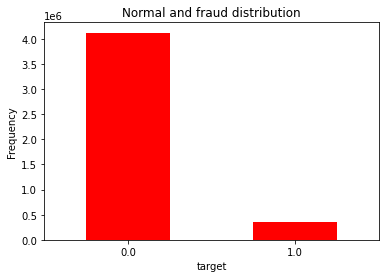

In [13]:
fraud_check = pd.value_counts(merge_df['target'], sort = True)
fraud_check.plot(kind = 'bar', rot=0, color='r')
plt.title('Normal and fraud distribution')
plt.xlabel('target')
plt.ylabel('Frequency')
## defining labels to replace our 0 and 1 valuelabels = ['Normal', 'Fraud']
## mapping tose labels

plt.xticks(range(2), labels)
plt.show()

In [14]:
fraud_trnx = merge_df[merge_df['target']==1]
normal_trnx = merge_df[merge_df['target']==0]

In [15]:
fraud_trnx.shape

(353112, 14)

In [16]:
normal_trnx.shape

(4123637, 14)

In [17]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
merge_df.set_index('client_id', inplace=True)

merge_df.head

<bound method NDFrame.head of                     tarif_type counter_statue  reading_remarque  \
client_id                                                         
train_Client_0              11              0                 8   
train_Client_0              11              0                 6   
train_Client_0              11              0                 8   
train_Client_0              11              0                 8   
train_Client_0              11              0                 9   
...                        ...            ...               ...   
train_Client_99998          10              0                 9   
train_Client_99998          10              0                 6   
train_Client_99999          11              0                 6   
train_Client_99999          11              0                 6   
train_Client_99999          11              0                 6   

                    counter_coefficient  consommation_level_1  \
client_id                        

In [19]:
##spliting the data into train and test data
X=merge_df.drop(labels=['target'],axis=1)                         
y=merge_df['target']
X.head()

,tarif_type,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
client_id,,,,,,,,,,,,
train_Client_0,11,0,8,1,82,0,0,0,14302,14384,4,ELEC
train_Client_0,11,0,6,1,1200,184,0,0,12294,13678,4,ELEC
train_Client_0,11,0,8,1,123,0,0,0,14624,14747,4,ELEC
train_Client_0,11,0,8,1,102,0,0,0,14747,14849,4,ELEC
train_Client_0,11,0,9,1,572,0,0,0,15066,15638,12,ELEC


In [20]:
y.head()

client_id
train_Client_0    0.0
train_Client_0    0.0
train_Client_0    0.0
train_Client_0    0.0
train_Client_0    0.0
Name: target, dtype: float64

In [21]:
label_encoder = LabelEncoder()
cols = ['counter_statue', 'counter_type']
X[cols]= X[cols].apply(LabelEncoder().fit_transform)
X.head()

,tarif_type,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
client_id,,,,,,,,,,,,
train_Client_0,11,0,8,1,82,0,0,0,14302,14384,4,0
train_Client_0,11,0,6,1,1200,184,0,0,12294,13678,4,0
train_Client_0,11,0,8,1,123,0,0,0,14624,14747,4,0
train_Client_0,11,0,8,1,102,0,0,0,14747,14849,4,0
train_Client_0,11,0,9,1,572,0,0,0,15066,15638,12,0


In [22]:
X.dtypes

tarif_type              int64
counter_statue          int32
reading_remarque        int64
counter_coefficient     int64
consommation_level_1    int64
consommation_level_2    int64
consommation_level_3    int64
consommation_level_4    int64
old_index               int64
new_index               int64
months_number           int64
counter_type            int32
dtype: object

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42,stratify=y)

In [24]:


iso_forest= IsolationForest(n_estimators=100, max_samples=len(X_train),random_state=0, verbose=0)

In [25]:
iso_forest.fit(X_train,y_train)

IsolationForest(max_samples=3133724, random_state=0)

In [26]:
ypred= iso_forest.predict(X_test)

In [27]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1

In [29]:
print(accuracy_score(y_test,ypred))

0.9201228569833027


In [30]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96   1237091
         1.0       0.12      0.00      0.00    105934

    accuracy                           0.92   1343025
   macro avg       0.52      0.50      0.48   1343025
weighted avg       0.86      0.92      0.88   1343025



In [ ]:
import joblib
filename = 'isoforest_model.sav'
joblib.dump(iso_forest, filename)

In [31]:
df_test = pd.read_csv('invoice_test.csv', low_memory=False)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939730 entries, 0 to 1939729
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        int64 
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(13), object(3)
memory usage: 236.8+ MB


In [33]:
df_test.shape

(1939730, 16)

In [34]:
df_test.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [35]:
new_df_test = df_test.drop(['invoice_date','counter_number', 'counter_code'], axis=1)
new_df_test.head()

,client_id,tarif_type,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,11,0,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,11,0,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,11,0,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,11,0,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,11,0,9,1,412,0,0,0,17471,17883,4,ELEC


In [36]:
df2 = pd.read_csv('client_test.csv', dtype=str)


In [37]:
df2.head()


,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [63]:
df2.tail()

,disrict,client_id,client_catg,region,creation_date
58064,63,test_Client_9995,11,399,17/03/2010
58065,63,test_Client_9996,11,311,28/05/2011
58066,60,test_Client_9997,11,101,04/03/1978
58067,60,test_Client_9998,11,101,23/02/2018
58068,69,test_Client_9999,11,104,14/03/1990


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   disrict        58069 non-null  object
 1   client_id      58069 non-null  object
 2   client_catg    58069 non-null  object
 3   region         58069 non-null  object
 4   creation_date  58069 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [39]:
label_encoder = LabelEncoder()
new_df_test['counter_type']= label_encoder.fit_transform(df_test['counter_type']) 
new_df_test.head()

,client_id,tarif_type,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,11,0,8,1,755,0,0,0,19145,19900,8,0
1,test_Client_0,11,0,8,1,1067,0,0,0,13725,14792,8,0
2,test_Client_0,11,0,8,1,0,0,0,0,14792,14792,4,0
3,test_Client_0,11,0,9,1,410,0,0,0,16122,16532,4,0
4,test_Client_0,11,0,9,1,412,0,0,0,17471,17883,4,0


In [40]:
new_df_test.set_index('client_id', inplace=True)

In [41]:
new_df_test.head()

,tarif_type,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
client_id,,,,,,,,,,,,
test_Client_0,11,0,8,1,755,0,0,0,19145,19900,8,0
test_Client_0,11,0,8,1,1067,0,0,0,13725,14792,8,0
test_Client_0,11,0,8,1,0,0,0,0,14792,14792,4,0
test_Client_0,11,0,9,1,410,0,0,0,16122,16532,4,0
test_Client_0,11,0,9,1,412,0,0,0,17471,17883,4,0


In [42]:
import joblib
loaded_model = joblib.load('isoforest_model.sav')

target = loaded_model.predict(new_df_test)

In [43]:
target[target == 1] = 0
target[target == -1] = 1

In [51]:
result_df = pd.DataFrame({
    "client_id": new_df_test.index,
    "target": target
})

In [52]:
result_df.head(15)

,client_id,target
0,test_Client_0,0
1,test_Client_0,0
2,test_Client_0,0
3,test_Client_0,0
4,test_Client_0,0
5,test_Client_0,0
6,test_Client_0,0
7,test_Client_0,0
8,test_Client_0,0
9,test_Client_0,0


In [53]:
result_df.shape

(1939730, 2)

In [54]:
result_df.to_csv('result_df')

In [ ]:
result_df = pd.DataFrame({
    "client_id": new_df_test.index,
    "target": target
})

In [60]:
new = pd.merge(new_df_test, result_df,on = 'client_id')

In [62]:
new.head()

,client_id,tarif_type,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,target
0,test_Client_0,11,0,8,1,755,0,0,0,19145,19900,8,0,0
1,test_Client_0,11,0,8,1,755,0,0,0,19145,19900,8,0,0
2,test_Client_0,11,0,8,1,755,0,0,0,19145,19900,8,0,0
3,test_Client_0,11,0,8,1,755,0,0,0,19145,19900,8,0,0
4,test_Client_0,11,0,8,1,755,0,0,0,19145,19900,8,0,0
